## AdaBoost Algorithm with Python Implementation

#### Importing libraries

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [254]:
df=pd.read_csv("heart_disease_uci.csv")

In [255]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Preprocessing

### Exploring the descriptive statistics of the variables

In [256]:
df.describe(include='all')

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


### Dealing with missing values

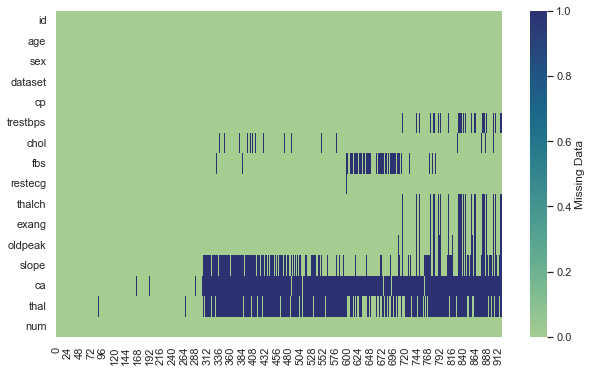

In [257]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="crest",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [258]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [259]:
# Fill up categorical & numerical data of the features and make a new filled feature df
x=df
x["trestbps"].fillna(x["trestbps"].mean(), inplace=True)
x["chol"].fillna(x["chol"].mean(), inplace=True)
x["fbs"].fillna(x["fbs"].mode()[0], inplace=True)
x["restecg"].fillna(x["restecg"].mode()[0], inplace=True)
x["thalch"].fillna(x["thalch"].mean(), inplace=True)
x["exang"].fillna(x["exang"].mode()[0], inplace=True)
x["oldpeak"].fillna(x["oldpeak"].mean(), inplace=True)
x["slope"].fillna(x["slope"].mode()[0], inplace=True)
x["ca"].fillna(x["ca"].mean(), inplace=True)
x["thal"].fillna(x["thal"].mode()[0], inplace=True)

In [260]:
x.drop(['id','dataset'],inplace=True, axis=1)

In [268]:
x['num'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [261]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [262]:
Y = x["num"]

In [188]:
x.drop('num',axis=1,inplace=True)

In [191]:
Y.shape,x.shape

((920,), (920, 13))

In [192]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [193]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer(
    [("one_hot", one_hot, cat_features)],
    remainder="passthrough"
)

transformed_x = transformer.fit_transform(x)

In [194]:
transformed_x.shape

(920, 25)

### After Cleaning the data set

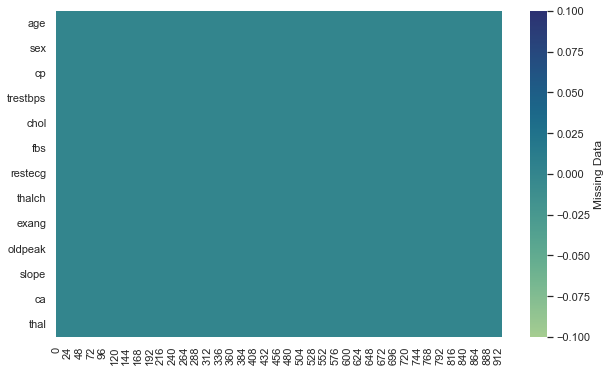

In [195]:
plt.figure(figsize=(10,6))
sns.heatmap(x.isna().transpose(),
            cmap="crest",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [203]:
transformed_x.shape,Y.shape

((920, 25), (920,))

### Train test Split

In [204]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, Y, test_size=0.2, random_state=365)

### import AdaBoost Classifier

In [205]:
from sklearn.ensemble import AdaBoostClassifier

In [206]:
clf = AdaBoostClassifier(random_state=96)
clf.fit(x_train, y_train)

AdaBoostClassifier(random_state=96)

In [207]:
#Calculating Score
clf.score(x_test,y_test)

0.5652173913043478

### Train the Model

In [238]:
from sklearn.ensemble import RandomForestClassifier

In [243]:
clf = AdaBoostClassifier(random_state=96, base_estimator=RandomForestClassifier(random_state=100)
                         ,n_estimators=100,learning_rate=0.001)
clf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=100),
                   learning_rate=0.001, n_estimators=100, random_state=96)

In [244]:
#Calculating Score
clf.score(x_test,y_test)

0.5706521739130435

In [248]:
yhat=clf.predict(x_test)

### Classfication Report

In [249]:
from sklearn.metrics import classification_report

# target_names = ["benig","malignant"]
print(classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.74      0.81      0.77        77
           1       0.49      0.58      0.53        60
           2       0.25      0.20      0.22        20
           3       0.33      0.13      0.19        23
           4       0.33      0.25      0.29         4

    accuracy                           0.57       184
   macro avg       0.43      0.39      0.40       184
weighted avg       0.54      0.57      0.55       184



In [250]:
from sklearn.metrics import confusion_matrix
# y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, yhat)
cm

array([[62, 13,  1,  1,  0],
       [17, 35,  6,  1,  1],
       [ 2, 11,  4,  3,  0],
       [ 3, 12,  4,  3,  1],
       [ 0,  1,  1,  1,  1]], dtype=int64)

### Confusion matrix

Text(39.5, 0.5, 'Truth')

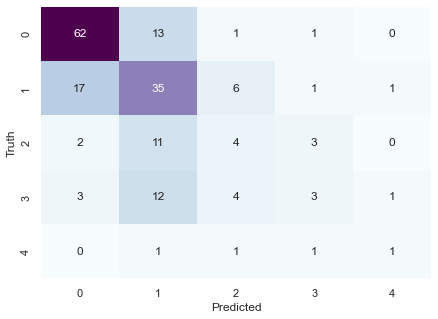

In [269]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True,fmt='d',cbar=False,cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Conclusion:
The data set is imbulanced so far that reasons the accuracy is not much incrasing

In [270]:
x['num'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64